<a href="https://colab.research.google.com/github/Rishi-0607/stock_price_prediction/blob/main/Stock_Market_Prediction_forecasting_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# used libraries keras and tensorflow >2.0

In [30]:
import pandas_datareader as pdr

key = "ec71219134f6e016adb86095c76c516a5b2e4914"

In [31]:
df = pdr.get_data_tiingo('AAPL',api_key=key)

<ipython-input-31-6eddcb5f2c35>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key=key)


In [32]:
df.to_csv('AAPL.csv')

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('/content/AAPL.csv')

In [35]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-01-07 00:00:00+00:00,147.93,148.83,145.90,148.70,54777764,35.495091,35.711042,35.008003,35.679849,219111056,0.0,1.0
1,AAPL,2019-01-08 00:00:00+00:00,150.75,151.82,148.52,149.56,41025314,36.171737,36.428478,35.636659,35.886202,164101256,0.0,1.0
2,AAPL,2019-01-09 00:00:00+00:00,153.31,154.53,149.63,151.29,45099081,36.785996,37.078729,35.902998,36.301307,180396324,0.0,1.0
3,AAPL,2019-01-10 00:00:00+00:00,153.80,153.97,150.86,152.50,35780670,36.903569,36.944360,36.198131,36.591641,143122680,0.0,1.0
4,AAPL,2019-01-11 00:00:00+00:00,152.29,153.70,151.51,152.88,27023241,36.541252,36.879575,36.354095,36.682820,108092964,0.0,1.0


In [36]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-12-28 00:00:00+00:00,193.58,194.6600,193.170,194.14,34049898,193.58,194.6600,193.170,194.14,34049898,0.0,1.0
1254,AAPL,2023-12-29 00:00:00+00:00,192.53,194.4000,191.725,193.90,42672148,192.53,194.4000,191.725,193.90,42672148,0.0,1.0
1255,AAPL,2024-01-02 00:00:00+00:00,185.64,188.4400,183.885,187.15,82488674,185.64,188.4400,183.885,187.15,82488674,0.0,1.0
1256,AAPL,2024-01-03 00:00:00+00:00,184.25,185.8800,183.430,184.22,58414460,184.25,185.8800,183.430,184.22,58414460,0.0,1.0
1257,AAPL,2024-01-04 00:00:00+00:00,181.91,183.0872,180.880,182.15,71983570,181.91,183.0872,180.880,182.15,71983570,0.0,1.0


In [37]:
df2 = df.reset_index()['close']

In [38]:
df2[1256:] # from which row number we can get

1256    184.25
1257    181.91
Name: close, dtype: float64

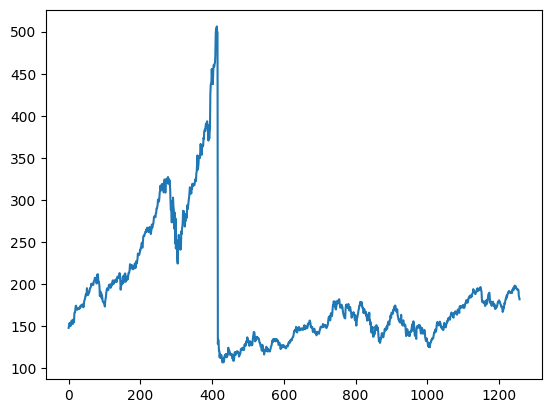

In [39]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [40]:
## LSTM are sensitive to the scale of the data. so we apply minmax scaler

In [41]:
import numpy as np

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [43]:
df2

array([[0.10291797],
       [0.10998121],
       [0.11639324],
       ...,
       [0.19737007],
       [0.19388854],
       [0.18802755]])

In [44]:
# splitting the dataset into train and test

training_size = int(len(df2)*0.65)
test_size = len(df2)-training_size
train_data,test_data = df2[0:training_size,:],df2[training_size:len(df2),:1]

In [45]:
training_size,test_size

(817, 441)

In [46]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+ time_step,0])
  return numpy.array(dataX), numpy.array(dataY)

In [47]:
# reshape into X=t, t+1, t+2 and Y=t+4
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [48]:
print(X_train)

[[0.10291797 0.10998121 0.11639324 ... 0.17881027 0.17668128 0.1789856 ]
 [0.10998121 0.11639324 0.11762054 ... 0.17668128 0.1789856  0.17089543]
 [0.11639324 0.11762054 0.11383845 ... 0.1789856  0.17089543 0.16646212]
 ...
 [0.11183469 0.1105072  0.1113087  ... 0.16839073 0.17001879 0.17222292]
 [0.1105072  0.1113087  0.10920476 ... 0.17001879 0.17222292 0.1806387 ]
 [0.1113087  0.10920476 0.1101315  ... 0.17222292 0.1806387  0.17765811]]


In [49]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [50]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [51]:
  # reshape input to be [samples, time steps, features] which is required for LSTM

  X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
  X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [52]:
# create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 320ms/step - loss: 0.0346 - val_loss: 6.9761e-04
Epoch 2/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0126 - val_loss: 3.4445e-04
Epoch 3/100
12/12 [==============================] - 4s 329ms/step - loss: 0.0096 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0086 - val_loss: 0.0017
Epoch 5/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0094 - val_loss: 0.0015
Epoch 6/100
12/12 [==============================] - 3s 228ms/step - loss: 0.0080 - val_loss: 2.4436e-04
Epoch 7/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0061 - val_loss: 5.4326e-04
Epoch 8/100
12/12 [==============================] - 4s 330ms/step - loss: 0.0053 - val_loss: 2.6924e-04
Epoch 9/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0049 - val_loss: 2.4938e-04
Epoch 10/100
12/12 [==============================] - 3s 228ms/ste

In [57]:
import tensorflow as tf

In [58]:
tf.__version__

'2.15.0'

In [59]:
# lets do the prediction and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 37ms/step


In [60]:
# transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [61]:
# calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

217.74948562423168

In [62]:
# test data RMSE

math.sqrt(mean_squared_error(y_test, test_predict))

163.30114710813314

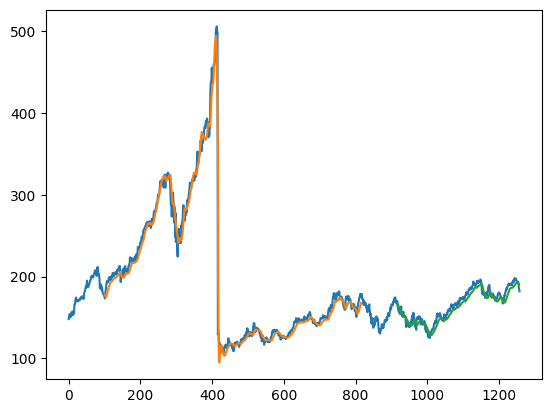

In [63]:
### plotting
# shift train predictions for plotting

look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting

testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [64]:
len(test_data)

441

In [65]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [66]:
temp_input = list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.18189104571070758,
 0.1768566061365059,
 0.1746524733876017,
 0.16821540388227924,
 0.16944270507200998,
 0.17282404508453347,
 0.17630557294927984,
 0.18604884157795865,
 0.17417658108954281,
 0.17976205385097055,
 0.18371947401377575,
 0.1935629304946775,
 0.20240450845335,
 0.20295554164057605,
 0.20693800876643703,
 0.20753913587977452,
 0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,
 0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,

In [67]:
# demonstrate prediction for next 10 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    # print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[0.20072778]
101
1 day input [0.17685661 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557
 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293 0.20240451
 0.20295554 0.20693801 0.20753914 0.19053225 0.17713212 0.17868503
 0.18164058 0.17397621 0.16874139 0.17257358 0.17074515 0.17815905
 0.18091421 0.1719474  0.16804008 0.17019411 0.17342517 0.16310582
 0.15927364 0.15992486 0.1612273  0.16758923 0.16420789 0.16736381
 0.17049468 0.17695679 0.18071384 0.17921102 0.18274264 0.18502192
 0.18036318 0.18003757 0.1761052  0.17282405 0.17187226 0.16541014
 0.16571071 0.16681277 0.16095178 0.15040701 0.15373826 0.15892298
 0.16012523 0.16814026 0.17715717 0.17485285 0.18131497 0.18780213
 0.19048215 0.1892799  0.19927364 0.19526612 0.20187852 0.2033062
 0.20756418 0.20751409 0.21192235 0.20989355 0.2115717  0.2082154
 0.20776456 0.20929242 0.20671259 0.20816531 0.21139637 0.20686287
 0.21685661 0.21410144 0.2189856  0.22259236 0.21625548 0.22008766
 0.22822793 0.22860363 0.2272511  0

In [68]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [69]:
import matplotlib.pyplot as plt

In [70]:
len(df2)

1258

In [71]:
df3 = df2.tolist()
df3.extend(lst_output)

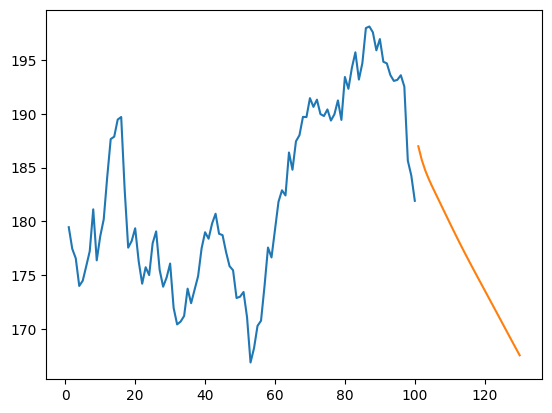

In [76]:
plt.plot(day_new,scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

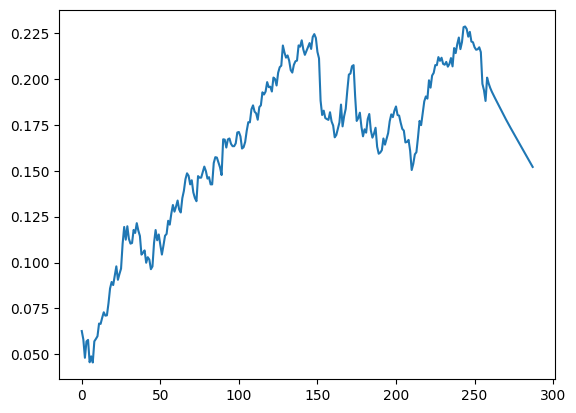

In [77]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])